#### OOD GANS Walkthrough

In [17]:
import sys
sys.path.insert(0, '../')

In [19]:
from config import *
from dataset import MNIST, CIFAR10
from models.mnist_cnn import MNISTCNN
from models.gans import *
# from trainer import train # Not needed for OOD GANS

# import autoreload code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset Processing


In [27]:
mnist_tri_set, mnist_val_set, mnist_tri_loader, mnist_val_loader = MNIST(128, 32, 2, True)
cifar_tri_set, cifar_val_set , cifar_tri_loader, cifar_val_loader = CIFAR10(128, 32)
# TODO: Show dataset statistics and sample images.

Files already downloaded and verified
Files already downloaded and verified


### Original GANS Implementation

Iter: 0, D: 1.395, G:0.6746


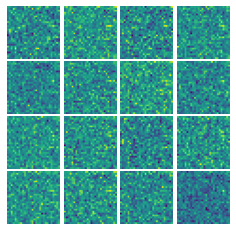


Iter: 250, D: 1.481, G:0.8066


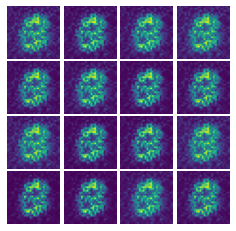


Iter: 500, D: 1.229, G:1.976


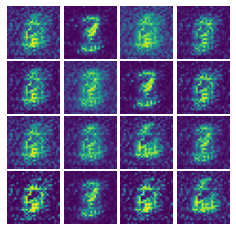


Iter: 750, D: 1.181, G:0.9436


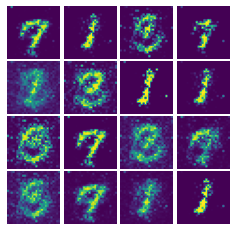


Iter: 1000, D: 1.112, G:1.251


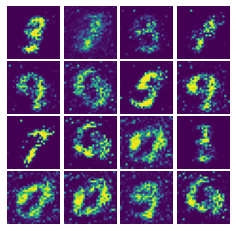

[E thread_pool.cpp:113] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

In [30]:
D = discriminator().to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver, 
            discriminator_loss, generator_loss, 'fc_gan_results.jpg')

### OOD GAN loss function
We can modify the loss function of the generator and discriminator to make sure our GANs generates OOD sample.


